In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from TX import euler, upf, bcc_rolling_fiber
from random import gauss, normalvariate
rot_vectang=bcc_rolling_fiber.rot_vectang
euler=euler.euler

In [3]:
## gamma fiber
uvw=np.array([-1,1,0])
hkl=np.array([1,1,1])

# uvw//X, 
x=uvw/sqrt((uvw**2).sum())
z=hkl/sqrt((hkl**2).sum())
## z should be cross product
y=np.cross(z,x)

## transformation matrix that transform from SA to CA
R=np.zeros((3,3))
R[:,0]=x[:]
R[:,1]=y[:]
R[:,2]=z[:]

phi1,phi,phi2=euler(a=R,echo=False)
print('%6.2f %6.2f %6.2f '%(phi1,phi,phi2))

180.00  54.74  45.00 


Elapsed time for calculting dots:           2 [ ms]

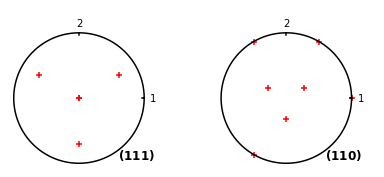

In [4]:
gr=np.array([[phi1,phi,phi2,1.]])
mypf=upf.polefigure(grains=gr,csym='cubic')
fig=mypf.pf_new(mode='dot',poles=[[1,1,1],[1,1,0]],marker='+',c='r')
#fig=mypf.pf_new(poles=[[1,1,1],[1,1,0]])

1.069037273398219 0.10533235108759698


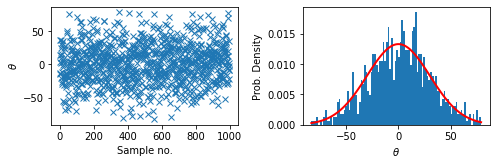

In [33]:
mu, sigma = 0, 30 # mean and standard deviation
nsamp=int(1e3)
nbins=100
s = np.random.normal(mu, sigma, nsamp)
print(abs(mu - np.mean(s)), abs(sigma - np.std(s, ddof=1)))

fig=plt.figure(figsize=(7,2.4))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
ax1.plot(s,'x')
count, bins, ignored = ax2.hist(s, nbins, density=True)
ax2.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
          linewidth=2, color='r')

ax1.set_ylabel(r'$\theta$')
ax2.set_xlabel(r'$\theta$')
ax1.set_xlabel('Sample no.')
ax2.set_ylabel('Prob. Density')
fig.tight_layout()

Elapsed time for calling cells_pf:          23 [ ms]

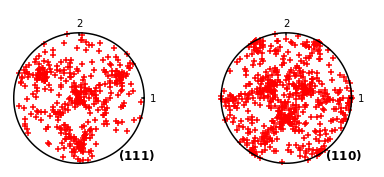

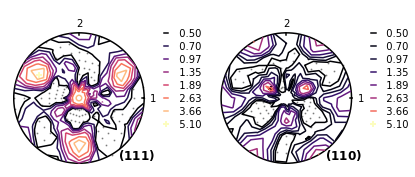

In [41]:
ngr=100
sigma=45
grains=np.zeros((ngr,4))
for i in range(ngr):
    s=np.random.normal(mu, sigma,1)
    #s=30
    newR=rot_vectang(s,R)
    grains[i,:3]=euler(a=newR,echo=False)
    grains[i,3]=1.
mypf=upf.polefigure(grains=grains,csym='cubic')
fig=mypf.pf_new(mode='dot',poles=[[1,1,1],[1,1,0]],marker='+',c='r')
fig=mypf.pf_new(poles=[[1,1,1],[1,1,0]])